In [4]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time


In [5]:
# Load datasets
train_data = np.load("landmark_train_original.npz")
val_data = np.load("landmark_val_original.npz")
test_data = np.load("landmark_test_original.npz")

X_train, y_train = train_data["data"], train_data["labels"]
X_val, y_val = val_data["data"], val_data["labels"]
X_test, y_test = test_data["data"], test_data["labels"]

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 8582
Validation set size: 1839
Test set size: 1840


In [13]:
# Test multiple K values
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

best_k = None
best_accuracy = 0
results = {}

# Track training time
start_time = time.time()

for k in k_values:
    # Initialize KNN with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Validate on the validation set
    y_val_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    results[k] = accuracy

    print(f"K = {k}, Validation Accuracy = {accuracy:.4f}")

    # Update the best K value
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print("\nBest K:", best_k)
print("Best Validation Accuracy:", best_accuracy)

# Train the final model with the best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Cross-validation
print("\nPerforming Cross-Validation...")
cross_val_scores = cross_val_score(knn_final, X_train, y_train, cv=5)  # Use knn_final with best_k
print("Cross-validation scores:", cross_val_scores)
print(f"Mean Cross-Validation Accuracy: {np.mean(cross_val_scores):.4f}")

# Test accuracy
y_test_pred = knn_final.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)


K = 1, Validation Accuracy = 0.9364
K = 3, Validation Accuracy = 0.9375
K = 5, Validation Accuracy = 0.9391
K = 7, Validation Accuracy = 0.9391
K = 9, Validation Accuracy = 0.9396
K = 11, Validation Accuracy = 0.9407
K = 13, Validation Accuracy = 0.9396
K = 15, Validation Accuracy = 0.9380
K = 17, Validation Accuracy = 0.9380
K = 19, Validation Accuracy = 0.9369

Best K: 11
Best Validation Accuracy: 0.9407286568787384

Performing Cross-Validation...
Cross-validation scores: [0.94117647 0.95340711 0.93648019 0.93997669 0.94871795]
Mean Cross-Validation Accuracy: 0.9440

Test Accuracy: 0.941304347826087


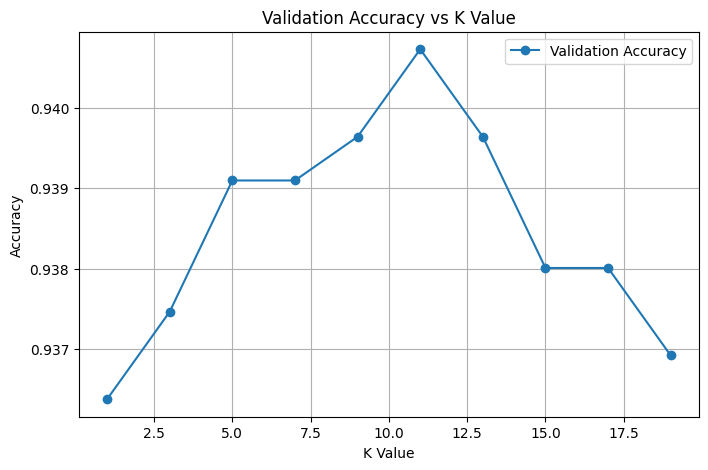

In [14]:
# Plot validation accuracy for different K values
plt.figure(figsize=(8, 5))
plt.plot(k_values, [results[k] for k in k_values], marker='o', label="Validation Accuracy")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy vs K Value")
plt.grid(True)
plt.legend()
plt.show()

In [16]:
# Train final model with the best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)  # Train the model
print(f"Final model trained with K = {best_k}")



Final model trained with K = 11


In [17]:
# Test accuracy
y_test_pred = knn_final.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9413



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       925
           1       0.94      0.95      0.94       915

    accuracy                           0.94      1840
   macro avg       0.94      0.94      0.94      1840
weighted avg       0.94      0.94      0.94      1840



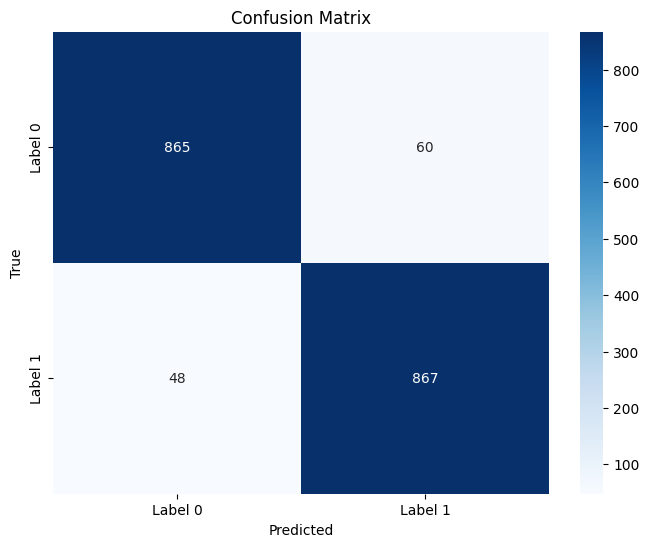

In [18]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Label 0", "Label 1"], yticklabels=["Label 0", "Label 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [19]:
# Perform cross-validation
print("\nPerforming Cross-Validation...")
cross_val_scores = cross_val_score(knn_final, X_train, y_train, cv=5)

# Print cross-validation results
print("Cross-validation scores:", cross_val_scores)
print(f"Mean Cross-Validation Accuracy: {np.mean(cross_val_scores):.4f}")


Performing Cross-Validation...
Cross-validation scores: [0.94117647 0.95340711 0.93648019 0.93997669 0.94871795]
Mean Cross-Validation Accuracy: 0.9440


In [20]:
# Save the final model
with open("knn_final_model.pkl", "wb") as file:
    pickle.dump(knn_final, file)
print("\nFinal KNN model saved as knn_final_model.pkl")



Final KNN model saved as knn_final_model.pkl


In [21]:
print(f"\nTotal Training and Evaluation Time: {time.time() - start_time:.2f} seconds")



Total Training and Evaluation Time: 344.55 seconds
